___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import os
import seaborn as sns

%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
# Use datetime to set start and end datetime objects.
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)
print(start, end)

2006-01-01 00:00:00 2016-01-01 00:00:00


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
# Figure out the ticker symbol for each bank.
ticker_symbols = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [4]:
bank_stocks = web.get_data_tiingo(
    ticker_symbols,
    start,
    end,
    api_key="b8dea376dd874deb8b757f1ae414e316ba8d014b",
)

In [5]:
bank_stocks

close     high     low   open    volume  \
symbol date                                                                 
BAC    2006-01-03 00:00:00+00:00  47.08  47.1800  46.150  46.92  16296700   
       2006-01-04 00:00:00+00:00  46.58  47.2400  46.450  47.00  17757900   
       2006-01-05 00:00:00+00:00  46.64  46.8300  46.320  46.58  14970700   
       2006-01-06 00:00:00+00:00  46.57  46.9100  46.350  46.80  12599800   
       2006-01-09 00:00:00+00:00  46.60  46.9700  46.360  46.72  15619400   
...                                 ...      ...     ...    ...       ...   
WFC    2015-12-24 00:00:00+00:00  54.82  55.0900  54.710  54.97   4999417   
       2015-12-28 00:00:00+00:00  54.68  54.7800  54.170  54.55   8288759   
       2015-12-29 00:00:00+00:00  55.29  55.3500  54.990  55.11   7894876   
       2015-12-30 00:00:00+00:00  54.89  55.3100  54.794  55.27   8016893   
       2015-12-31 00:00:00+00:00  54.36  54.9499  54.220  54.51  10929420   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
BAC    2006-01-03 00:00:00+00:00  32.456673  32.525613  31.815537  32.346370   
       2006-01-04 00:00:00+00:00  32.111976  32.566976  32.022355  32.401522   
       2006-01-05 00:00:00+00:00  32.153340  32.284325  31.932734  32.111976   
       2006-01-06 00:00:00+00:00  32.105082  32.339476  31.953416  32.263643   
       2006-01-09 00:00:00+00:00  32.125764  32.380840  31.960310  32.208492   
...                                     ...        ...        ...        ...   
WFC    2015-12-24 00:00:00+00:00  45.780216  46.005693  45.688355  45.905481   
       2015-12-28 00:00:00+00:00  45.663302  45.746812  45.237400  45.554739   
       2015-12-29 00:00:00+00:00  46.172713  46.222819  45.922183  46.022395   
       2015-12-30 00:00:00+00:00  45.838673  46.189415  45.758503  46.156011   
       2015-12-31 00:00:00+00:00  45.396070  45.888695  45.279156  45.521335   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
BAC    2006-01-03 00:00:00+00:00   16296700      0.0          1.0  
       2006-01-04 00:00:00+00:00   17757900      0.0          1.0  
       2006-01-05 00:00:00+00:00   14970700      0.0          1.0  
       2006-01-06 00:00:00+00:00   12599800      0.0          1.0  
       2006-01-09 00:00:00+00:00   15619400      0.0          1.0  
...                                     ...      ...          ...  
WFC    2015-12-24 00:00:00+00:00    4999417      0.0          1.0  
       2015-12-28 00:00:00+00:00    8288759      0.0          1.0  
       2015-12-29 00:00:00+00:00    7894876      0.0          1.0  
       2015-12-30 00:00:00+00:00    8016893      0.0          1.0  
       2015-12-31 00:00:00+00:00   10929420      0.0          1.0  

[15102 rows x 12 columns]

In [6]:
bank_stocks.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [7]:
bank_stocks.index

MultiIndex([('BAC', '2006-01-03 00:00:00+00:00'),
            ('BAC', '2006-01-04 00:00:00+00:00'),
            ('BAC', '2006-01-05 00:00:00+00:00'),
            ('BAC', '2006-01-06 00:00:00+00:00'),
            ('BAC', '2006-01-09 00:00:00+00:00'),
            ('BAC', '2006-01-10 00:00:00+00:00'),
            ('BAC', '2006-01-11 00:00:00+00:00'),
            ('BAC', '2006-01-12 00:00:00+00:00'),
            ('BAC', '2006-01-13 00:00:00+00:00'),
            ('BAC', '2006-01-17 00:00:00+00:00'),
            ...
            ('WFC', '2015-12-17 00:00:00+00:00'),
            ('WFC', '2015-12-18 00:00:00+00:00'),
            ('WFC', '2015-12-21 00:00:00+00:00'),
            ('WFC', '2015-12-22 00:00:00+00:00'),
            ('WFC', '2015-12-23 00:00:00+00:00'),
            ('WFC', '2015-12-24 00:00:00+00:00'),
            ('WFC', '2015-12-28 00:00:00+00:00'),
            ('WFC', '2015-12-29 00:00:00+00:00'),
            ('WFC', '2015-12-30 00:00:00+00:00'),
            ('WFC', '2015-12-31 00

In [8]:
bank_stocks.values

array([[4.708000e+01, 4.718000e+01, 4.615000e+01, ..., 1.629670e+07,
        0.000000e+00, 1.000000e+00],
       [4.658000e+01, 4.724000e+01, 4.645000e+01, ..., 1.775790e+07,
        0.000000e+00, 1.000000e+00],
       [4.664000e+01, 4.683000e+01, 4.632000e+01, ..., 1.497070e+07,
        0.000000e+00, 1.000000e+00],
       ...,
       [5.529000e+01, 5.535000e+01, 5.499000e+01, ..., 7.894876e+06,
        0.000000e+00, 1.000000e+00],
       [5.489000e+01, 5.531000e+01, 5.479400e+01, ..., 8.016893e+06,
        0.000000e+00, 1.000000e+00],
       [5.436000e+01, 5.494990e+01, 5.422000e+01, ..., 1.092942e+07,
        0.000000e+00, 1.000000e+00]])

In [9]:
# https://stackoverflow.com/a/41208732
bank_stocks = (
    bank_stocks.pivot_table(index="date", columns="symbol")
    .swaplevel(axis=1)
    .sort_index(1)
)

In [10]:
bank_stocks

symbol                           BAC                                   \
                            adjClose    adjHigh     adjLow    adjOpen   
date                                                                    
2006-01-03 00:00:00+00:00  32.456673  32.525613  31.815537  32.346370   
2006-01-04 00:00:00+00:00  32.111976  32.566976  32.022355  32.401522   
2006-01-05 00:00:00+00:00  32.153340  32.284325  31.932734  32.111976   
2006-01-06 00:00:00+00:00  32.105082  32.339476  31.953416  32.263643   
2006-01-09 00:00:00+00:00  32.125764  32.380840  31.960310  32.208492   
...                              ...        ...        ...        ...   
2015-12-24 00:00:00+00:00  15.434494  15.532803  15.389808  15.479180   
2015-12-28 00:00:00+00:00  15.309374  15.398745  15.175316  15.389808   
2015-12-29 00:00:00+00:00  15.443431  15.505992  15.336185  15.416620   
2015-12-30 00:00:00+00:00  15.237876  15.407683  15.228939  15.371934   
2015-12-31 00:00:00+00:00  15.041259  15.255751  15.041259  15.202128   

symbol                                                                   ...  \
                          adjVolume  close divCash   high    low   open  ...   
date                                                                     ...   
2006-01-03 00:00:00+00:00  16296700  47.08     0.0  47.18  46.15  46.92  ...   
2006-01-04 00:00:00+00:00  17757900  46.58     0.0  47.24  46.45  47.00  ...   
2006-01-05 00:00:00+00:00  14970700  46.64     0.0  46.83  46.32  46.58  ...   
2006-01-06 00:00:00+00:00  12599800  46.57     0.0  46.91  46.35  46.80  ...   
2006-01-09 00:00:00+00:00  15619400  46.60     0.0  46.97  46.36  46.72  ...   
...                             ...    ...     ...    ...    ...    ...  ...   
2015-12-24 00:00:00+00:00  29373415  17.27     0.0  17.38  17.22  17.32  ...   
2015-12-28 00:00:00+00:00  41759993  17.13     0.0  17.23  16.98  17.22  ...   
2015-12-29 00:00:00+00:00  45628449  17.28     0.0  17.35  17.16  17.25  ...   
2015-12-30 00:00:00+00:00  35035518  17.05     0.0  17.24  17.04  17.20  ...   
2015-12-31 00:00:00+00:00  47106760  16.83     0.0  17.07  16.83  17.01  ...   

symbol                           WFC                                      \
                              adjLow    adjOpen adjVolume  close divCash   
date                                                                       
2006-01-03 00:00:00+00:00  19.952610  20.211652  11016400  63.80     0.0   
2006-01-04 00:00:00+00:00  20.061344  20.339574  10870000  63.06     0.0   
2006-01-05 00:00:00+00:00  20.026165  20.147691  10158000  62.99     0.0   
2006-01-06 00:00:00+00:00  20.074136  20.198860   8403800  63.36     0.0   
2006-01-09 00:00:00+00:00  20.182870  20.259623   5619600  63.35     0.0   
...                              ...        ...       ...    ...     ...   
2015-12-24 00:00:00+00:00  45.688355  45.905481   4999417  54.82     0.0   
2015-12-28 00:00:00+00:00  45.237400  45.554739   8288759  54.68     0.0   
2015-12-29 00:00:00+00:00  45.922183  46.022395   7894876  55.29     0.0   
2015-12-30 00:00:00+00:00  45.758503  46.156011   8016893  54.89     0.0   
2015-12-31 00:00:00+00:00  45.279156  45.521335  10929420  54.36     0.0   

symbol                                                                   
                              high     low   open splitFactor    volume  
date                                                                     
2006-01-03 00:00:00+00:00  63.9500  62.390  63.20         1.0   5508200  
2006-01-04 00:00:00+00:00  63.6400  62.730  63.60         1.0   5435000  
2006-01-05 00:00:00+00:00  63.1100  62.620  63.00         1.0   5079000  
2006-01-06 00:00:00+00:00  63.5500  62.770  63.16         1.0   4201900  
2006-01-09 00:00:00+00:00  63.6500  63.110  63.35         1.0   2809800  
...                            ...     ...    ...         ...       ...  
2015-12-24 00:00:00+00:00  55.0900  54.710  54.97         1.0   4999417  
2015-12-28 00:00:00+00:00  54.7800  54.170  54.55  

** Set the column name levels (this is filled out for you):**

In [11]:
bank_stocks.columns.names = ["Bank Ticker", "Stock Info"]

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker                      BAC                                   \
Stock Info                  adjClose    adjHigh     adjLow    adjOpen   
date                                                                    
2006-01-03 00:00:00+00:00  32.456673  32.525613  31.815537  32.346370   
2006-01-04 00:00:00+00:00  32.111976  32.566976  32.022355  32.401522   
2006-01-05 00:00:00+00:00  32.153340  32.284325  31.932734  32.111976   
2006-01-06 00:00:00+00:00  32.105082  32.339476  31.953416  32.263643   
2006-01-09 00:00:00+00:00  32.125764  32.380840  31.960310  32.208492   

Bank Ticker                                                              ...  \
Stock Info                adjVolume  close divCash   high    low   open  ...   
date                                                                     ...   
2006-01-03 00:00:00+00:00  16296700  47.08     0.0  47.18  46.15  46.92  ...   
2006-01-04 00:00:00+00:00  17757900  46.58     0.0  47.24  46.45  47.00  ...   
2006-01-05 00:00:00+00:00  14970700  46.64     0.0  46.83  46.32  46.58  ...   
2006-01-06 00:00:00+00:00  12599800  46.57     0.0  46.91  46.35  46.80  ...   
2006-01-09 00:00:00+00:00  15619400  46.60     0.0  46.97  46.36  46.72  ...   

Bank Ticker                      WFC                                      \
Stock Info                    adjLow    adjOpen adjVolume  close divCash   
date                                                                       
2006-01-03 00:00:00+00:00  19.952610  20.211652  11016400  63.80     0.0   
2006-01-04 00:00:00+00:00  20.061344  20.339574  10870000  63.06     0.0   
2006-01-05 00:00:00+00:00  20.026165  20.147691  10158000  62.99     0.0   
2006-01-06 00:00:00+00:00  20.074136  20.198860   8403800  63.36     0.0   
2006-01-09 00:00:00+00:00  20.182870  20.259623   5619600  63.35     0.0   

Bank Ticker                                                          
Stock Info                  high    low   open splitFactor   volume  
date                                                                 
2006-01-03 00:00:00+00:00  63.95  62.39  63.20         1.0  5508200  
2006-01-04 00:00:00+00:00  63.64  62.73  63.60         1.0  5435000  
2006-01-05 00:00:00+00:00  63.11  62.62  63.00         1.0  5079000  
2006-01-06 00:00:00+00:00  63.55  62.77  63.16         1.0  4201900  
2006-01-09 00:00:00+00:00  63.65  63.11  63.35         1.0  2809800  

[5 rows x 72 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [13]:
bank_stocks.xs(key="close", axis=1, level=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
for tick in ticker_symbols:
    returns[tick + "_return"] = bank_stocks[tick]["close"].pct_change()
returns.head()

,BAC_return,C_return,GS_return,JPM_return,MS_return,WFC_return
date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

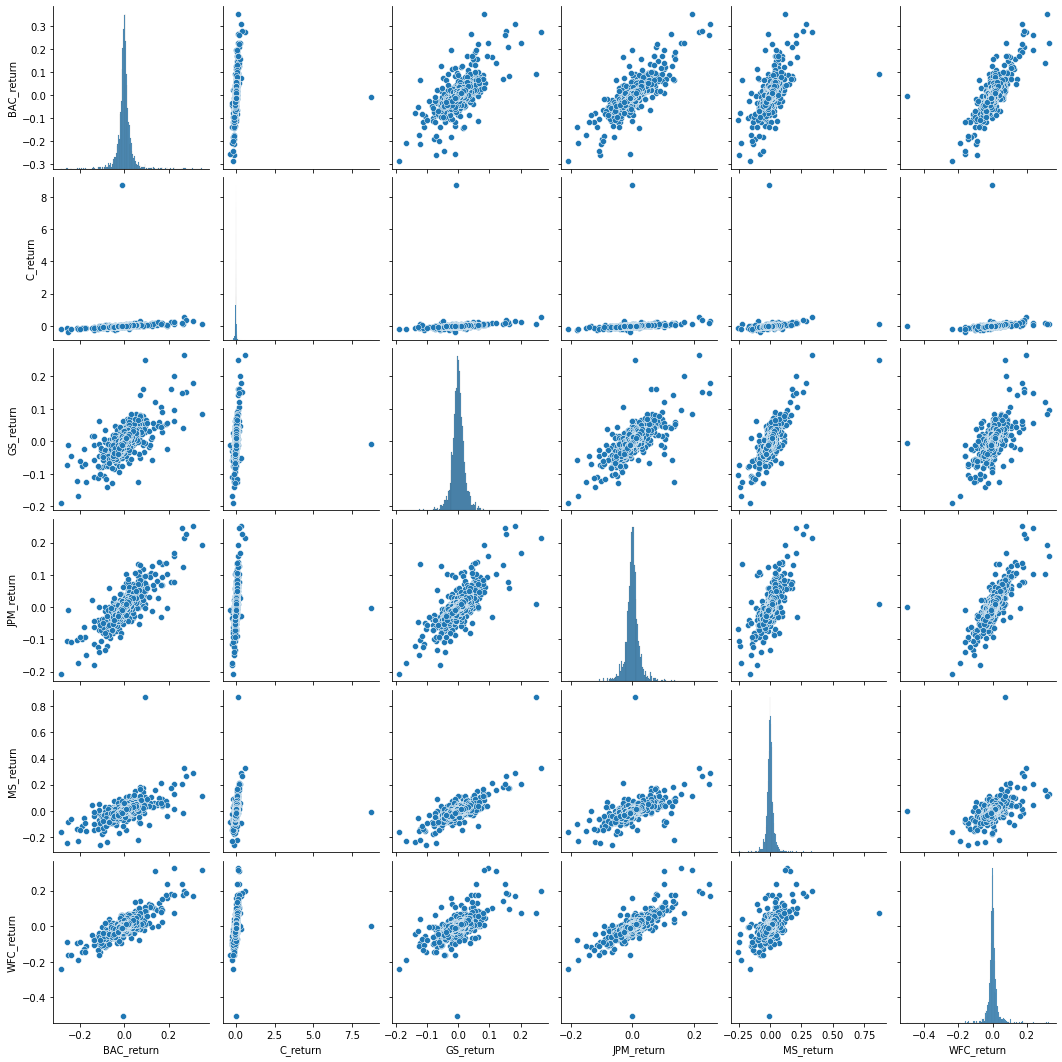

In [16]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
returns.idxmin()

BAC_return   2009-01-20 00:00:00+00:00
C_return     2009-02-27 00:00:00+00:00
GS_return    2009-01-20 00:00:00+00:00
JPM_return   2009-01-20 00:00:00+00:00
MS_return    2008-10-09 00:00:00+00:00
WFC_return   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [18]:
returns.idxmax()

BAC_return   2009-04-09 00:00:00+00:00
C_return     2011-05-09 00:00:00+00:00
GS_return    2008-11-24 00:00:00+00:00
JPM_return   2009-01-21 00:00:00+00:00
MS_return    2008-10-13 00:00:00+00:00
WFC_return   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BAC_return    0.036628
C_return      0.179066
GS_return     0.025358
JPM_return    0.027651
MS_return     0.037821
WFC_return    0.031838
dtype: float64

In [20]:
returns.loc["2015-01-01":"2016-01-01"].std()

BAC_return    0.016163
C_return      0.015289
GS_return     0.014046
JPM_return    0.014017
MS_return     0.016249
WFC_return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

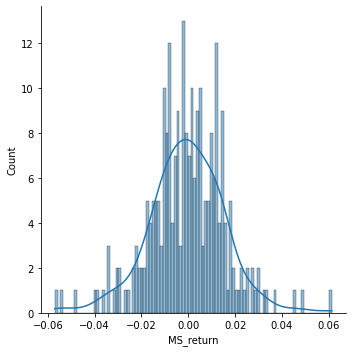

In [21]:
sns.displot(
    data=returns["MS_return"].loc["2015-01-01":"2016-01-01"],
    kind="hist",
    bins=100,
    kde=True,
)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

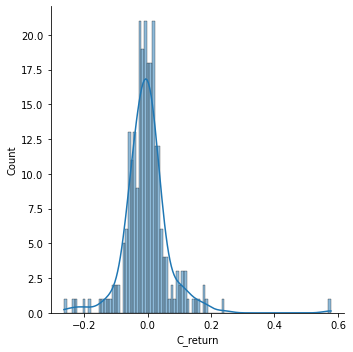

In [22]:
sns.displot(
    data=returns["C_return"].loc["2008-01-01":"2009-01-01"],
    kind="hist",
    bins=100,
    kde=True,
)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf

cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

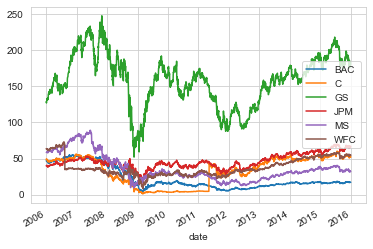

In [24]:
for tick in ticker_symbols:
    bank_stocks[tick]['close'].plot(label=tick)
plt.legend()

<AxesSubplot:xlabel='date'>

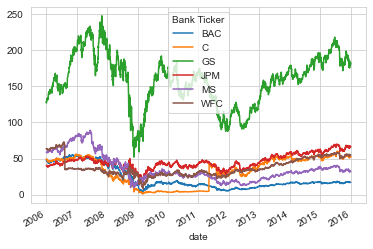

In [25]:
bank_stocks.xs(key="close",axis=1,level=1).plot()

In [26]:
bank_stocks.xs(key="close",axis=1,level=1).iplot()

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.